<a href="https://colab.research.google.com/github/Jay0774/Machine_learning/blob/master/LINEAR_REGRESSION_BOSTONHOUSINGDATA_(Another%20variable).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IN THIS WE WILL USE LINEAR REGRESSION DIRECTLY ON BOSTON HOUSING DATA

## STEP 1 : GET BOSTON HOUSING DATA

In [1]:
import numpy as np # muli dimensional array 
import pandas as  pd # load data in data frame object
import matplotlib as mlp
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.animation import FuncAnimation # animations 

# all required libraries from sklearn
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML # for display

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# first we need to get data 

boston = load_boston()
boston


{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [3]:
# to get features from data set we use pandas

features = pd.DataFrame(boston.data,columns=boston.feature_names)
 

# to get any column
features['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

GETTING THE TARGET VARIABLE FOR LINER REGRESSION MODEL

In [0]:
# to get the target column of boston dataset
target = pd.DataFrame(boston.target,columns=['target'])


In [5]:
# to concatenate the complete set use concat with axis=1 for columns
df = pd.concat([features,target],axis=1)

# visualization od dataset
# describing the dataset
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


# STEP 2 : DATA VISUALIZATION -
PLOTTING THE DATA AND FINDING THE CORRELATION BETWEEN DIFFERENT VARIABLES 

CPU times: user 29.4 s, sys: 6.79 s, total: 36.1 s
Wall time: 28.3 s


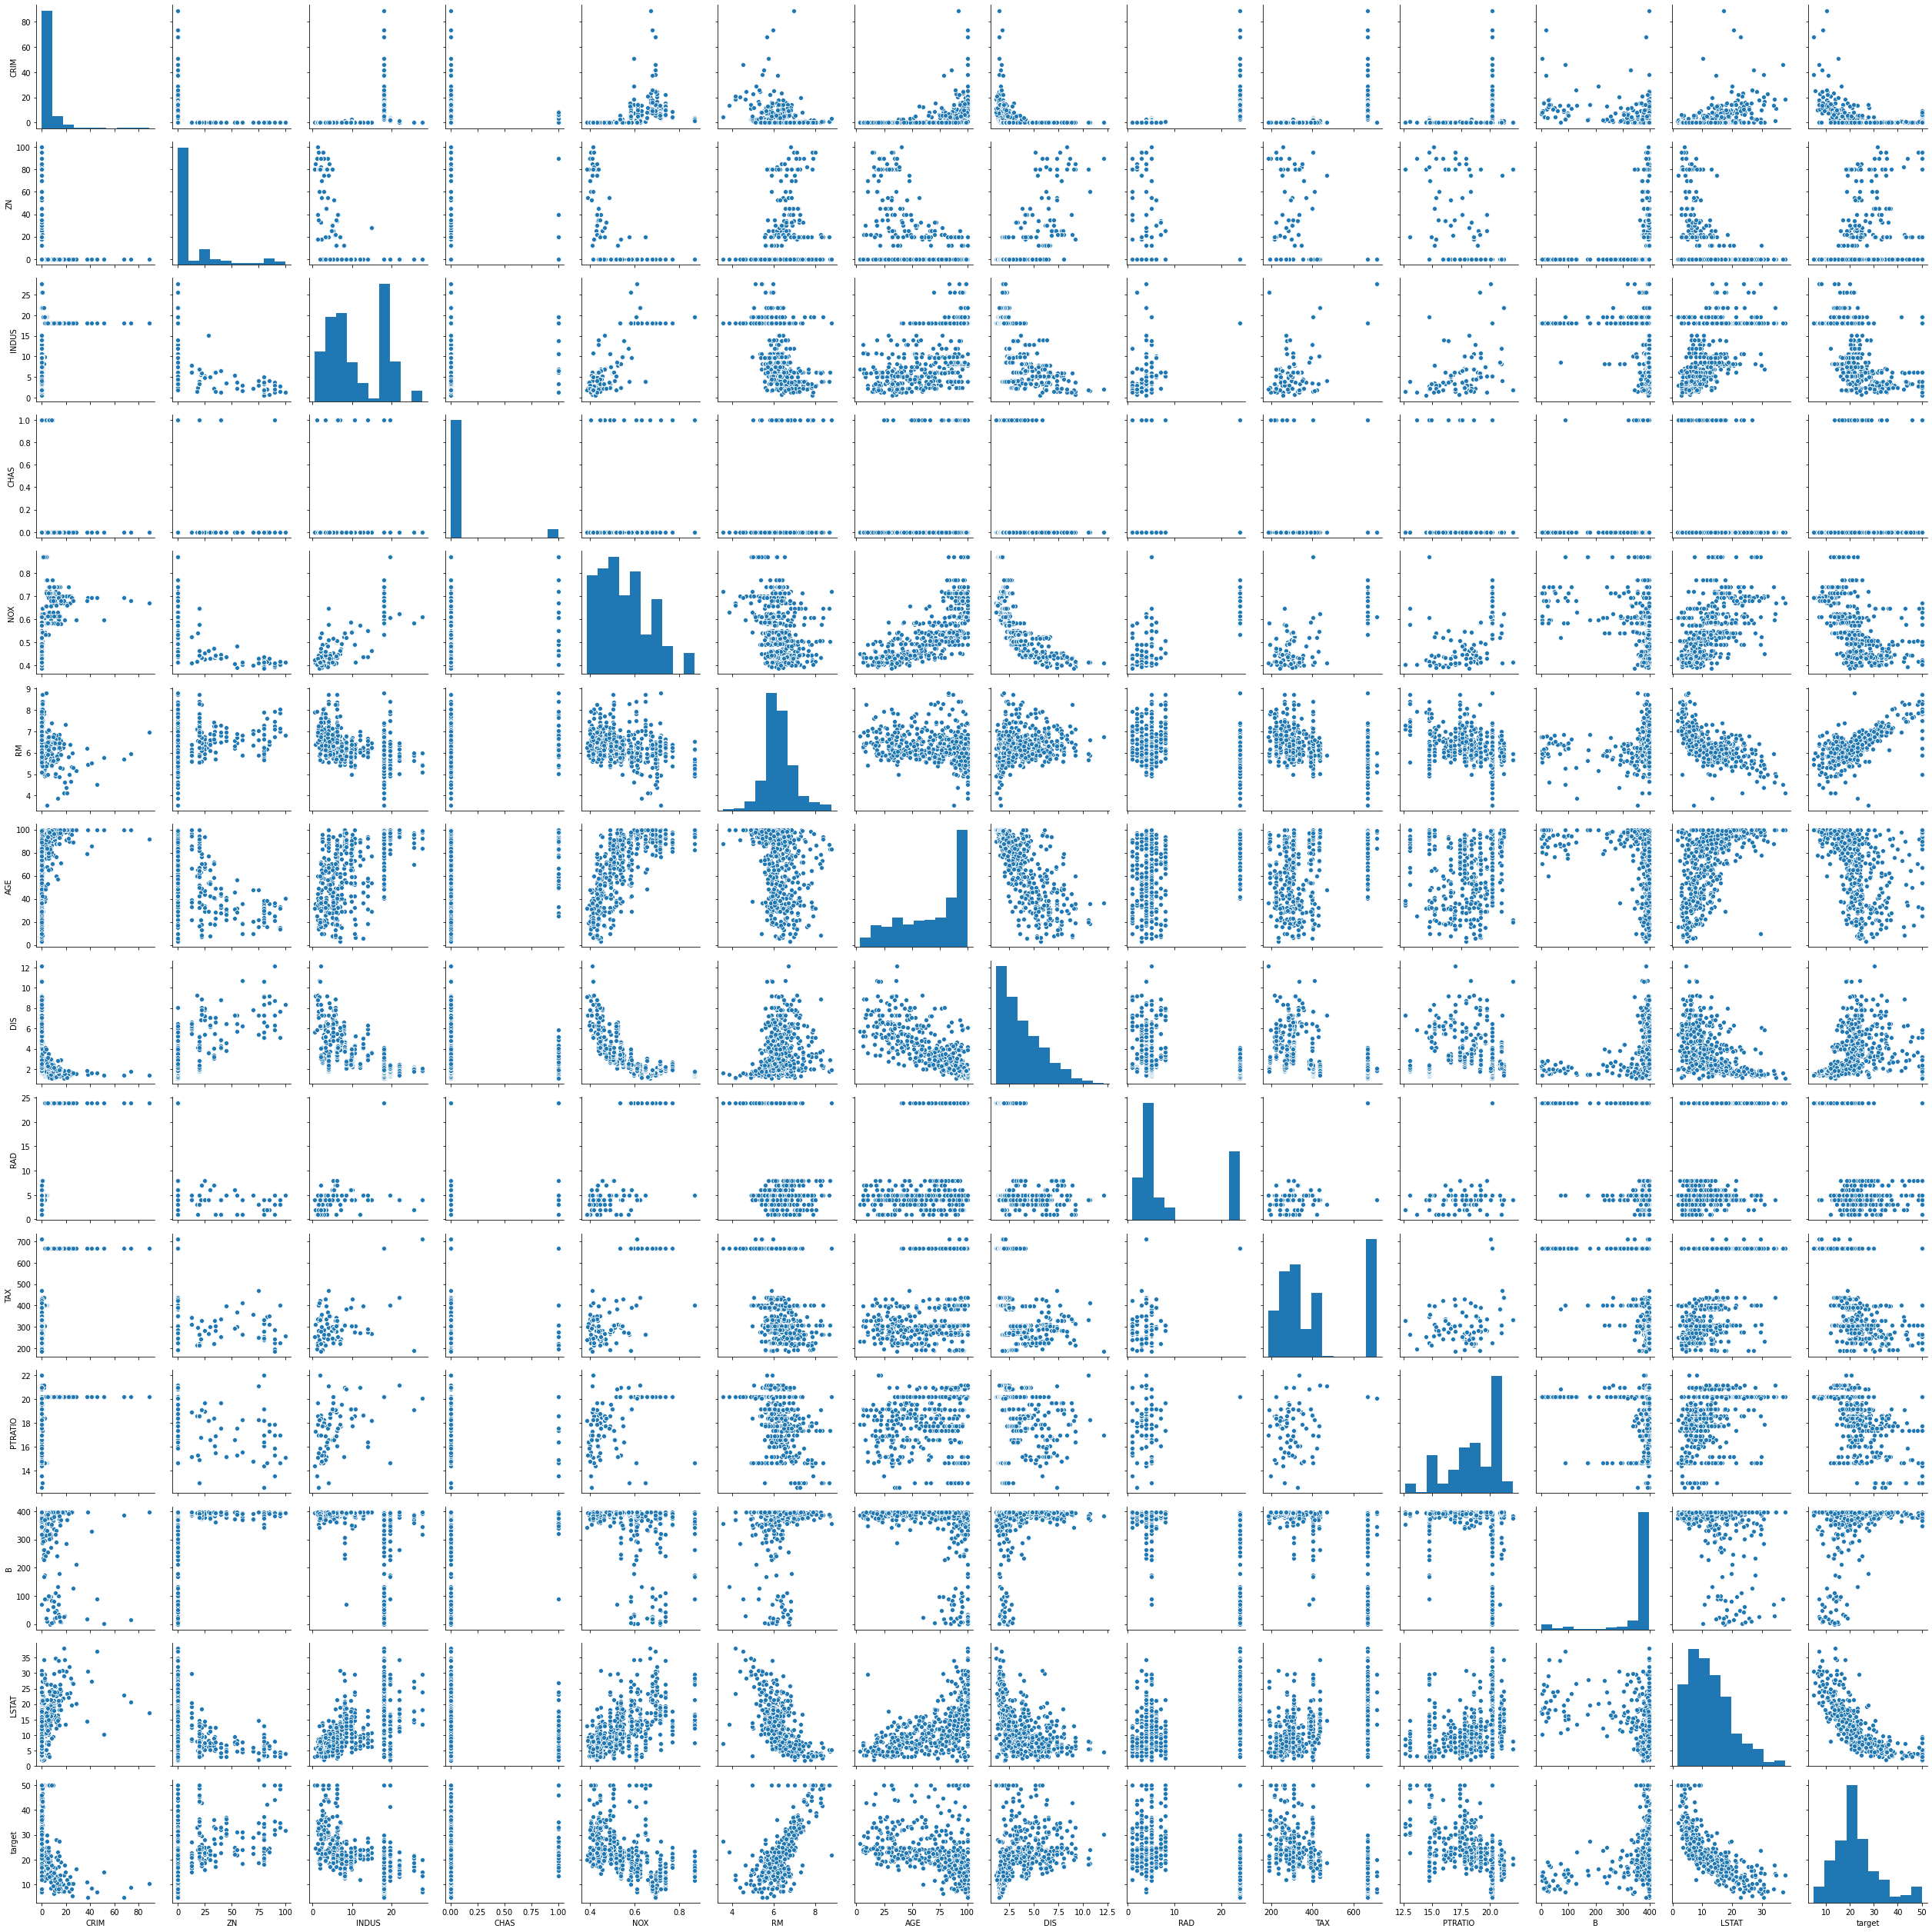

In [6]:
%%time
# Calculate and show pairplot
sns.pairplot(df, height=2.5)
plt.tight_layout()

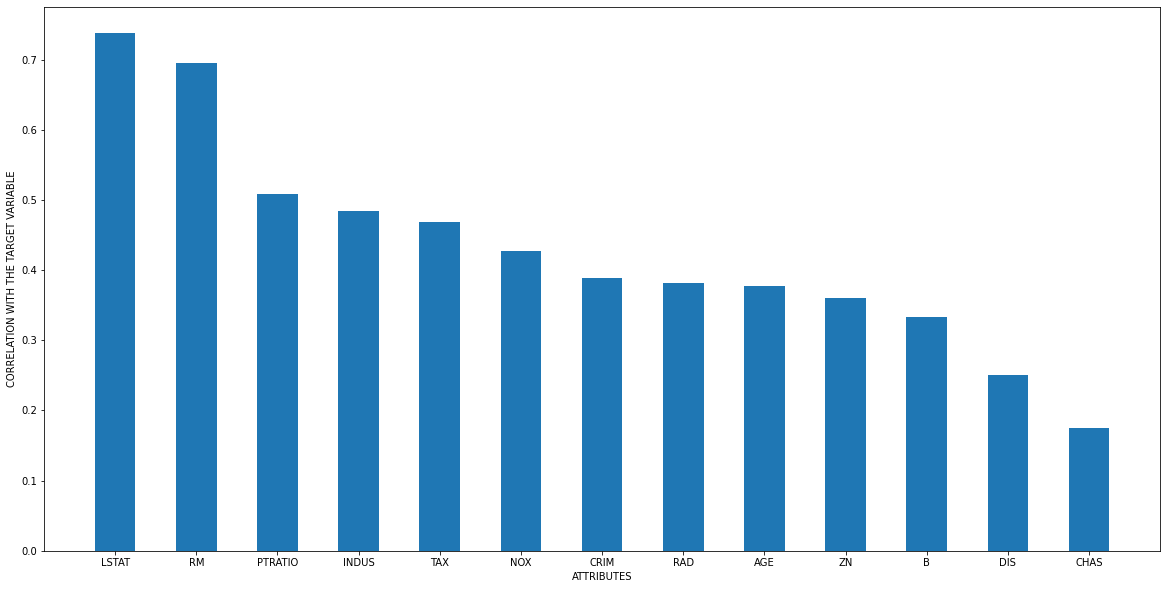

In [7]:
# claculating correlation between every column in data 

corr = df.corr('pearson').round(decimals=5)

# to get corelation between different objects
# 1. get all the features as a list
feature = list(features)

# 2.use correaltio to get correlations
corrs = [abs(corr[attr]['target']) for attr in feature]

# 3. use zip function to aggregate elements fron two iterators corrs and feature
l = list(zip(corrs,feature))

# 4. use sort function to sort the zip in decending order
l.sort(key= lambda x : x[0], reverse=True)

# 5. unzip the list l in two lists using zip function 
corr, labels = list(zip(*l))

# now finally plot a graph to show the correlations
index = np.arange(len(labels))
plt.figure(figsize=(20,10))
plt.bar(index,corr,width=0.5)
plt.xlabel('ATTRIBUTES')
plt.ylabel('CORRELATION WITH THE TARGET VARIABLE')
plt.xticks(index,labels)
plt.show()


FROM ABOVE PLOT IT  IS CLEAR THAT 'LSTAT' HAS THE HIGHEST CORRELATION WITH THE TARGET VARIABLE

# STEP 3 : DATA SPLITTING AND RESHAPING

In [0]:
# to get variables for normalization in regression model
X = df['RM'].values
Y = df['target'].values

# using minmaxscaler

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1,1))
X = X[ : -1]

y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1,1))
Y = Y[ : -1]


# STEP 4 : LINEAR REGERSSION MODEL

In [0]:
# Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

In [0]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)


In [17]:
# Fit the training data to the model using grid search
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

predicted = reg.predict(X_test)
print(reg.coef_)

mse = mean_squared_error(y_test,predicted)
mse

r = r2_score(y_test,predicted)
r


[[1.10520274]]


0.3814002576925628

Text(0, 0.5, 'PREDICETD & Y_TEST')

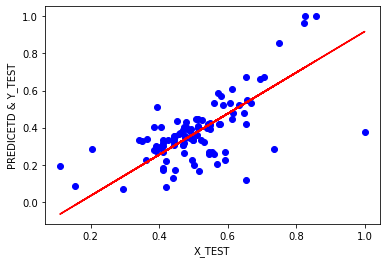

In [18]:
plt.scatter(X_test,y_test,color='b')
plt.plot(X_test,predicted,color='r')

plt.xlabel('X_TEST')
plt.ylabel('PREDICETD & Y_TEST')
